# [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skojaku/adv-net-sci/blob/main/notebooks/m09-graph-neural-nets/exercise-m09-graph-neural-net.ipynb)


# Exercise M09: Graph Neural Networks

## Image Processing

Let's perform the Fourier transform on an image.  
For an image $X$ with size $H \times W$, the Fourier transform of $X$ is:

$$
\begin{aligned}
\mathcal{F}(X)[h, w] &= \sum_{k=0}^{H-1} \sum_{\ell=0}^{W-1} X[k, \ell] \cdot e^{-2\pi i \frac{hk}{H}} \cdot e^{-2\pi i \frac{w\ell}{W}} \\
&= \sum_{k=0}^{H-1} \sum_{\ell=0}^{W-1} X[k, \ell] e^{-2\pi i \left(\frac{hk}{H} + \frac{w\ell}{W}\right)}
\end{aligned}
$$

The exponential term $e^{-2\pi i \left(\frac{hk}{H} + \frac{w\ell}{W}\right)}$ represents a 2D wave with frequency $(h, w)$, which looks like the following: 


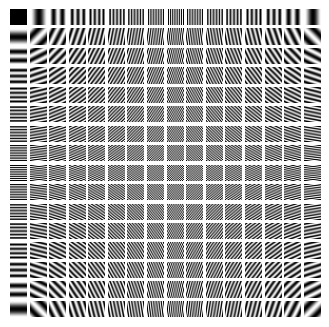

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def basis_function(img_size=256, u=0, v=0):
    """
    img_size : square size of image f(x,y)
    u,v : spatial space indice
    """
    N = img_size
    x = np.linspace(0, N - 1, N)
    y = np.linspace(0, N - 1, N)
    x_, y_ = np.meshgrid(x, y)
    bf = np.exp(-1j * 2 * np.pi * (u * x_ / N + v * y_ / N))
    if u == 0 and v == 0:
        bf = np.round(bf)
    real = np.real(bf)  # The cosine part
    imag = np.imag(bf)  # The sine part
    return real, imag


size = 16
bf_arr_real = np.zeros((size * size, size, size))
bf_arr_imag = np.zeros((size * size, size, size))
ind = 0
for col in range(size):
    for row in range(size):
        re, imag = basis_function(img_size=size, u=row, v=col)
        bf_arr_real[ind] = re
        bf_arr_imag[ind] = imag
        ind += 1

# real part
_, axs = plt.subplots(size, size, figsize=(4, 4))
axs = axs.flatten()
for img, ax in zip(bf_arr_real, axs):
    ax.set_axis_off()
    ax.imshow(img, cmap="gray")


**Note 🤔**: It is common to reorder the basis functions such that the lowest frequency components are at the center, which looks like this:


Text(0.5, 0.98, 'Real Part of Basis Functions')

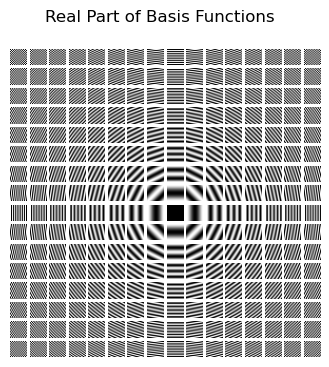

In [ ]:
bf_arr_real = np.zeros((size * size, size, size))
bf_arr_imag = np.zeros((size * size, size, size))
ind = 0
for col in range(-size // 2, size // 2):
    for row in range(-size // 2, size // 2):
        re, imag = basis_function(img_size=size, u=row, v=col)
        bf_arr_real[ind] = re
        bf_arr_imag[ind] = imag
        ind += 1

# real part
fig, axs = plt.subplots(size, size, figsize=(4, 4))
axs = axs.flatten()
for img, ax in zip(bf_arr_real, axs):
    ax.set_axis_off()
    ax.imshow(img, cmap="gray")

fig.suptitle("Real Part of Basis Functions")



Now, let's perform the Fourier transform on an image.


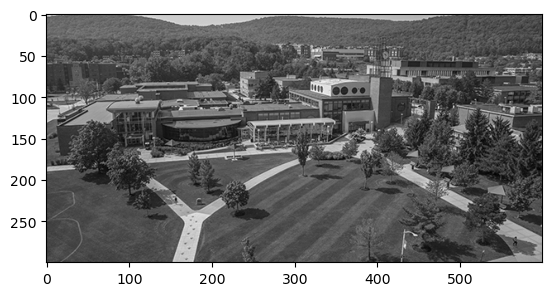

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


# Read image from URL
def read_jpeg_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # Convert to RGB mode if needed (in case it's RGBA)
    if img.mode != "RGB":
        img = img.convert("RGB")
    return img


def image_to_numpy(img):
    return np.array(img)


def to_gray_scale(img_np):
    return np.mean(img_np, axis=2)


# URL of the image. You can change this to any image you want.
url = "https://www.binghamton.edu/news/images/uploads/features/20180815_peacequad02_jwc.jpg"

img = read_jpeg_from_url(url)
img_np = image_to_numpy(img)
img_gray = to_gray_scale(img_np)

plt.imshow(img_gray, cmap="gray")

Take the Fourier transform of the image.

In [6]:
ft_img_gray = np.fft.fft2(img_gray)

This decomposes the image into a sum of basis waves. Let's see the weights of the basis waves.

(-0.5, 599.5, 299.5, -0.5)

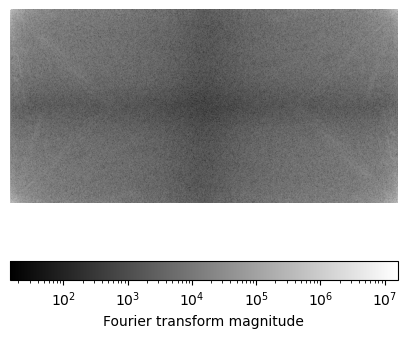

In [ ]:
import matplotlib

weight = np.abs(ft_img_gray)

# real part
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.imshow(weight, cmap="gray", norm=matplotlib.colors.LogNorm(), aspect="equal")
cbar = fig1.colorbar(ax1.images[0], ax=ax1, orientation="horizontal")
cbar.set_label("Fourier transform magnitude")
ax1.axis("off")

The pixel’s brightness indicates the strength of its associated basis wave: a brighter pixel means that wave plays a more dominant role in the image. We can see that there are some high‑frequency components, which correspond to the image’s edges.


**Your task 🧑‍💻**

Now, let's see the convolution of the image with a Prewitt operator.

The Prewitt operator is a type of edge detection filter that highlights regions of an image with high spatial derivatives. 

An example of the Prewitt operator for detecting horizontal edges is:

$$
K = \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
   -1 & -1 & -1
\end{bmatrix}
$$

Implement the Prewitt operator, and see the result of the convolution.

In [ ]:
K = np.zeros((3, 3))  # Change this to the Prewitt operator

This operator is used to detect the horizontal edges of the image. 
Let's compute the Fourier transform of the Prewitt operator.

In [ ]:
K_padd = np.zeros((img_gray.shape[0], img_gray.shape[1]))
K_padd[: K.shape[0], : K.shape[1]] = K  # We put K in the corner of the padded matrix

# convolution
FK = np.fft.fft2(K_padd)

**Note 🤔**: We have padded the operator to the same size as the image, which is required to perform the convolution. Now, let's see the weights of the basis waves.


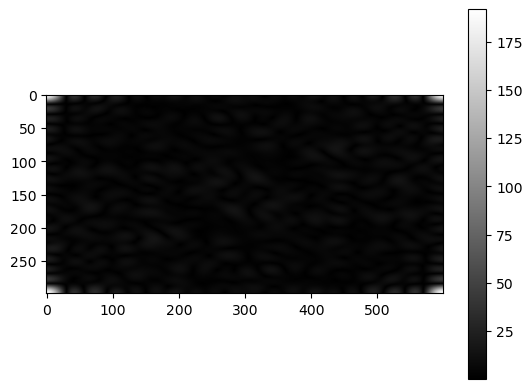

In [ ]:
plt.imshow(np.abs(FK), cmap="gray")
cbar = plt.colorbar()

Observe that the low frequency components are suppressed, and the high frequency components are enhanced. This is because the Prewitt operator is a high-pass filter that only allows high-frequency components to pass through.


We now perform the convolution of the image with the Prewitt operator.

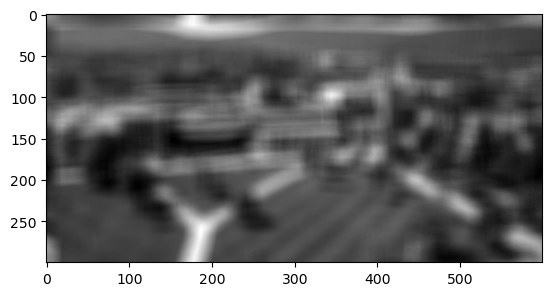

In [ ]:
FX = np.fft.fft2(img_gray)
conv_img_gray = np.real(np.fft.ifft2(FX * FK))
plt.imshow(conv_img_gray, cmap="gray")

### Exercise 1 🏋️:

Design your own kernel to:
1. Detect the vertical edges of the image.
2. Smooth the image.


**1. Kernel to detect the vertical edges of the image.**

**2. Kernel to smooth the image.**

## Spectral Graph Convolutional Networks

We can think of a convolution of an image from the perspective of networks.
In the convolution of an image, a pixel is convolved with its *neighbors*. We can regard each pixel as a node, and each node is connected to its neighboring nodes (pixels) that are involved in the convolution.

![](https://av-eks-lekhak.s3.amazonaws.com/media/__sized__/article_images/conv_graph-thumbnail_webp-600x300.webp)

Suppose that each node has a variable $x_i \in \mathbb{R}$, just like each pixel has a value in a grey image. Consider a network of $N$ such nodes. 

In this example, we use the karate club network and set $x$ by a random gaussian variable.

In [12]:
import igraph as ig
import numpy as np
from scipy import sparse
import matplotlib as mpl

G = ig.Graph.Famous("Zachary")
A = G.get_adjacency_sparse()

x = np.random.randn(G.vcount())



We define the *total variation* of ${\mathbf x}$ as the sum of the squared differences between connected nodes:

$$
J = \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N A_{ij}(x_i - x_j)^2 = {\bf x}^\top {\bf L} {\bf x},
$$

where ${\bf L}$ is the Laplacian matrix of the graph given by

$$
L_{ij} = \begin{cases}
-1 & \text{if } i \text{ and } j \text{ are connected} \\
k_i & \text{if } i = j \\
0 & \text{otherwise}
\end{cases}.
$$

and ${\bf x} = [x_1,x_2,\ldots, x_N]^\top$ is a column vector of feature variables.

In [ ]:
# Compute the total variation of x by definition
J = 0
for i in range(G.vcount()):
    for j in range(G.vcount()):
        if A[i, j] != 0:
            J += (x[i] - x[j]) ** 2
J = J / 2

# Compute the total variation of x by using the Laplacian matrix
deg = A.sum(axis=1).A1
L = sparse.diags(deg) - A
J_by_laplacian = x.T @ L @ x

print(f"J: {J}, J_by_laplacian: {J_by_laplacian}")

J: 143.47621936312473, J_by_laplacian: 143.4762193631247


We decompose the total variation into high-frequency and low-frequency components by using the eigenvectors ${\bf u}_i$ and the eigenvalues $\lambda_i$ of the Laplacian matrix:

$$
J = \sum_{i=1}^N \lambda_i  {\bf x}^\top {\mathbf u}_i {\mathbf u}_i^\top {\bf x} = \sum_{i=1}^N \lambda_i  ||{\bf x}^\top {\mathbf u}_i||^2.
$$

The term $({\bf x}^\top {\mathbf u}_i)$ is a dot-product between the feature vector ${\bf x}$ and the eigenvector ${\mathbf u}_i$, measuring how much ${\bf x}$ aligns with ${\mathbf u}_i$, similar to Fourier coefficients with sinusoids. Each $||{\bf x}^\top {\mathbf u}_i||^2$ represents the ''strength'' of ${\bf x}$ with respect to ${\mathbf u}_i$, making the total variation $J$ a weighted sum of these strengths.

In [ ]:
# Compute the eigenvalues and eigenvectors of the Laplacian matrix
eigvals, eigvecs = np.linalg.eigh(L.toarray())

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigvals)
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

strength = []
for i in range(len(eigvals)):
    strength.append(np.sum((x.T @ eigvecs[:, i]) ** 2))

J_by_eig = np.sum(strength * eigvals)
print(f"J: {J}, J_by_eig: {J_by_eig}")

J: 143.47621936312473, J_by_eig: 143.47621936312473


And here is the "frequency" of each component in increasing order of eigenvalues (frequency).

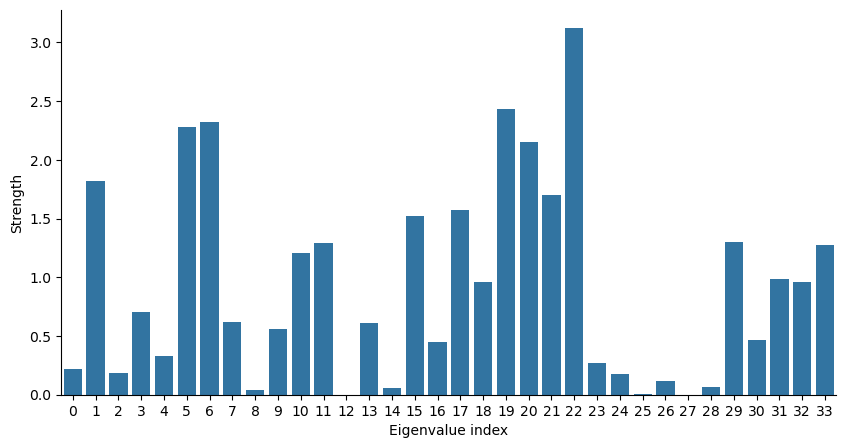

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=range(len(eigvals)), y=strength)

ax.set_xlabel("Eigenvalue index")

ax.set_ylabel("Strength")
sns.despine()
plt.show()

The eigenvalues $\lambda_i$ are then multipled by the strength of the corresponding component, and the total is the total variation $J$.  

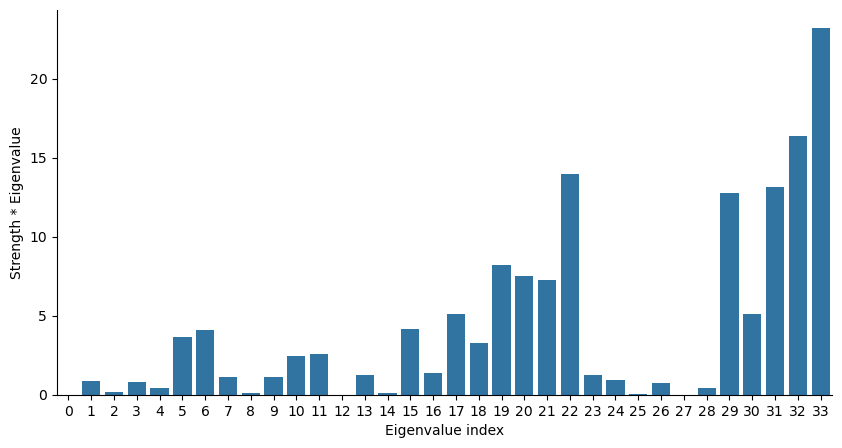

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=range(len(eigvals)), y=strength * eigvals)

ax.set_xlabel("Eigenvalue index")

ax.set_ylabel("Strength * Eigenvalue")
sns.despine()
plt.show()

Now, we can consider "eigenvals" as a filter that controls which frequency components pass through 😉. For example, if we want to keep the low-frequency components, we can set the high-frequency components to zero.

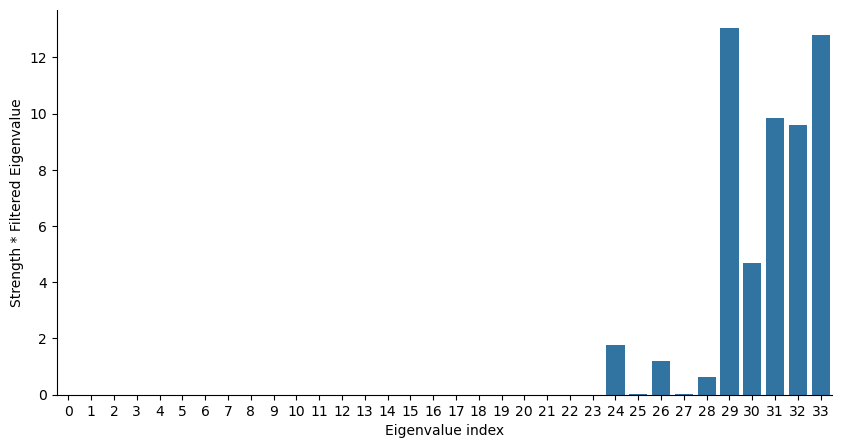

In [17]:
eigvals_filtered = eigvals.copy()
eigvals_filtered[:-10] = 0
eigvals_filtered[-10:] = 10

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=range(len(eigvals)), y=strength * eigvals_filtered)

ax.set_xlabel("Eigenvalue index")

ax.set_ylabel("Strength * Filtered Eigenvalue")
sns.despine()
plt.show()

Using this filter, we reconstruct the Laplacian matrix.  



In [18]:
L_filtered = eigvecs @ np.diag(eigvals) @ eigvecs.T

<Axes: title={'center': 'Reconstructed Laplacian from filtered eigenvalues'}>

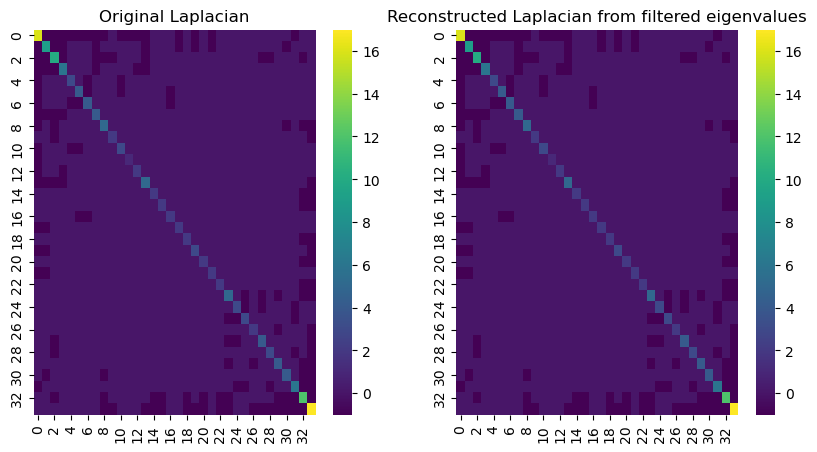

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title("Original Laplacian")
axes[1].set_title("Reconstructed Laplacian from filtered eigenvalues")
sns.heatmap(L.toarray(), cmap="viridis", ax=axes[0])
sns.heatmap(L_filtered, cmap="viridis", ax=axes[1])

We now have a new "convolution" matrix $L_{\text{filtered}}$ with which to generate a new feature vector ${\bf x}'$.

In [20]:
x_prime = L_filtered @ x

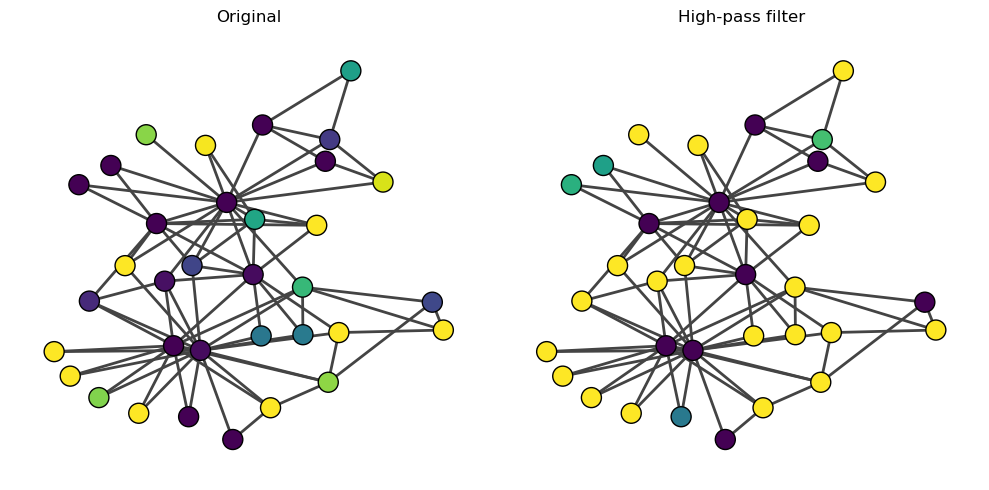

In [ ]:
fig, axes = plt.subplots(
    1,
    2,
    figsize=(10, 5),
)
palette = sns.color_palette("viridis", as_cmap=True)
norm = mpl.colors.Normalize(vmin=-0.8, vmax=0.8)

ig.plot(
    G,
    vertex_color=[palette(norm(_x)) for _x in x],
    bbox=(0, 0, 500, 500),
    vertex_size=20,
    target=axes[0],
)
axes[0].set_title("Original")

ig.plot(
    G,
    vertex_color=[palette(norm(_x)) for _x in x_prime],
    bbox=(0, 0, 500, 500),
    vertex_size=20,
    target=axes[1],
)
axes[1].set_title("High-pass filter")

fig.tight_layout()

Observe that the values of the nodes are smoothed out, since the high-frequency components are suppressed.

### Exercise 2 🏋️:

Design your own filter to detect the high-frequency components of the graph. And apply the filter to:

1. Random gaussian variables 
2. Eigenvector centrality of the graph.

Then, compare the results with the original ones.

**Construct your own filter**

In [ ]:
eigvals_filtered = eigvals.copy()

# Design your own filter here
alpha = 3
high_pass_filter = alpha * eigvals / (1 + alpha * eigvals)
# eigvals_filtered[:-10] = 0
# eigvals_filtered[-10:] = 10

L_filtered = eigvecs @ np.diag(high_pass_filter) @ eigvecs.T

**Apply the filter to random gaussian variables**

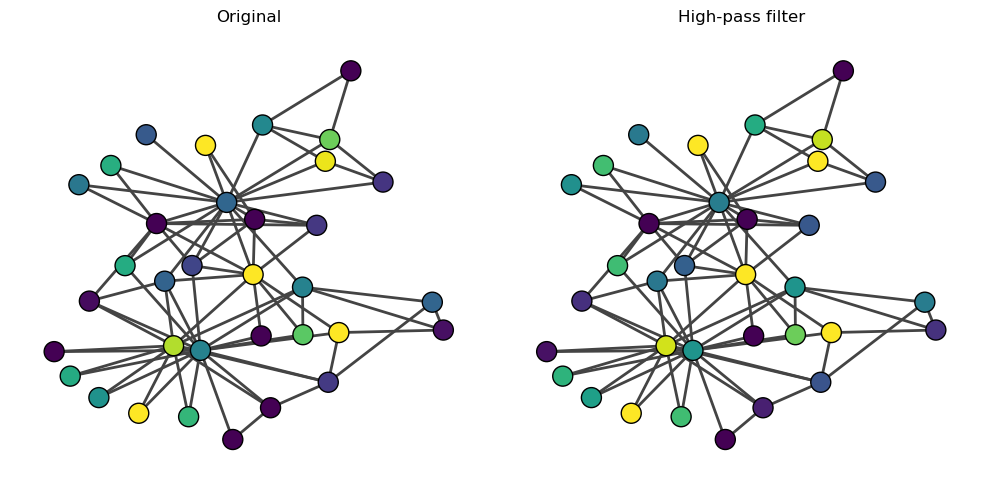

In [ ]:
x = np.random.randn(G.vcount())
x_prime = L_filtered @ x

fig, axes = plt.subplots(
    1,
    2,
    figsize=(10, 5),
)
palette = sns.color_palette("viridis", as_cmap=True)
norm = mpl.colors.Normalize(vmin=-0.8, vmax=0.8)

ig.plot(
    G,
    vertex_color=[palette(norm(_x)) for _x in x],
    bbox=(0, 0, 500, 500),
    vertex_size=20,
    target=axes[0],
)
axes[0].set_title("Original")

ig.plot(
    G,
    vertex_color=[palette(norm(_x)) for _x in x_prime],
    bbox=(0, 0, 500, 500),
    vertex_size=20,
    target=axes[1],
)
axes[1].set_title("High-pass filter")

fig.tight_layout()

**Apply the filter to eigenvector centrality**

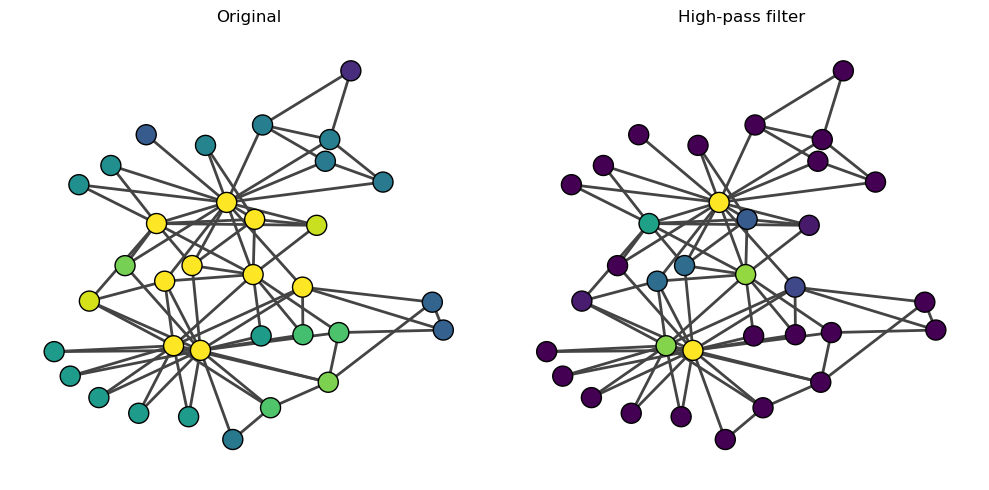

In [ ]:
x = G.eigenvector_centrality()

x_prime = L_filtered @ x

fig, axes = plt.subplots(
    1,
    2,
    figsize=(10, 5),
)
palette = sns.color_palette("viridis", as_cmap=True)
norm = mpl.colors.Normalize(vmin=0, vmax=0.5)

ig.plot(
    G,
    vertex_color=[palette(norm(_x)) for _x in x],
    bbox=(0, 0, 500, 500),
    vertex_size=20,
    target=axes[0],
)
axes[0].set_title("Original")

ig.plot(
    G,
    vertex_color=[palette(norm(_x)) for _x in x_prime],
    bbox=(0, 0, 500, 500),
    vertex_size=20,
    target=axes[1],
)
axes[1].set_title("High-pass filter")

fig.tight_layout()

# Graph Convolutional Networks

Let's implement a simple Graph Convolutional Network (GCN) by Kipf & Welling. We will use the karate club network again. To this end, we will use PyTorch. 

In [25]:
import torch

Let's work with multiple features for each node.


In [ ]:
X = torch.randn(G.vcount(), 5)  # one-hot encoding of the node indices
X.shape

torch.Size([34, 5])

GCN updates node features by:

$$
x' = \sigma\left( \tilde {\mathbf A} X \Theta\right)
$$

where 
1. $X$ is the feature matrix of the graph,
2. $\sigma$ is an activation function, and 
3. $\Theta$ is a learnable parameter matrix.
4. $\tilde {\mathbf A}$ is the normalized adjacency matrix of the graph (with self-loops).

Let's break down the formula. First, we will compute $\tilde {\mathbf A}$


$$
\tilde A = A + I
$$

$$
\tilde A' = D^{-\frac{1}{2}} \tilde A D^{-\frac{1}{2}}
$$

where $D$ is the degree matrix of the graph.


In [ ]:
A_hat = A + sparse.eye(A.shape[0])
deg = np.array(A.sum(axis=1)).flatten()
D_inv = sparse.diags(1.0 / np.sqrt(deg))
A_hat_norm = D_inv @ A_hat @ D_inv

Next, we will multiply it by feature matrix $X$ and learnable parameter matrix $\Theta$.

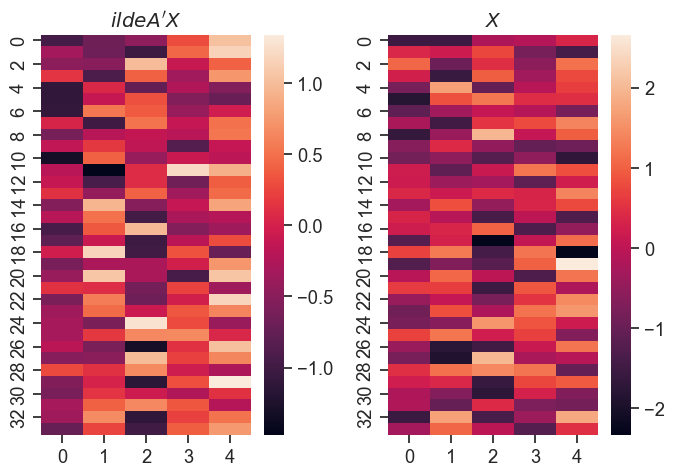

In [ ]:
A_hat_norm_X = A_hat_norm @ X


import seaborn as sns

sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5), ncols=2)

sns.heatmap(A_hat_norm_X, ax=ax[0])
ax[0].set_title("$\tilde A' X$")
sns.heatmap(X, ax=ax[1])
ax[1].set_title("$X$")
fig.tight_layout()

NameError: name 'label' is not defined

Now, let's prepare the learnable parameters and apply it to the feature matrix. We initialize the learnable parameters by random gaussian variables.




In [ ]:
Theta = torch.nn.Parameter(
    torch.randn(X.shape[1], 5), requires_grad=True
)  # The new feature x' has 5 dimensions.

And multiply it by $\tilde {\mathbf A} X$, and apply the activation function $\sigma$. We will use the sigmoid function as the activation function.




In [50]:
A_hat_norm_X_Theta = torch.FloatTensor(A_hat_norm_X) @ Theta

Now, let's visualize the updated feature matrix. Each row is a new feature vector of a node. 

In [51]:
A_hat_norm_X_Theta

tensor([[-1.4572, -1.9403, -0.7272, -0.2725, -2.0808],
        [-1.9921, -0.4401, -1.0513,  0.9501, -2.6424],
        [-0.6311, -2.0491, -0.8485, -1.4420,  1.4433],
        [-1.5469,  0.1742, -1.0070, -0.1495,  1.5867],
        [ 1.6015, -0.5518,  2.0935, -0.8556, -2.1988],
        [ 1.8263, -1.3327,  1.8476, -2.0504,  0.0873],
        [ 0.7726, -1.1897,  1.0957, -0.4288,  0.7173],
        [-1.1421, -0.7584, -1.0535, -0.9834,  0.9512],
        [-0.6245, -0.5426,  0.0605,  0.0958, -0.1737],
        [ 0.4014,  1.8373,  1.3304,  0.7373,  1.4460],
        [ 1.0981, -1.4278,  1.4925, -0.5556, -1.7260],
        [-1.9469, -3.6626, -2.7069, -1.9346, -2.8057],
        [-0.7871,  0.7059,  0.0806, -0.3470,  1.2428],
        [-0.9693,  0.3107, -0.5958,  0.0855,  1.6581],
        [-0.9192,  0.5812,  0.1524,  2.3961, -0.1381],
        [ 0.6702,  1.6580,  1.4718,  1.2845, -1.1531],
        [ 1.2142, -1.5611,  1.0431, -1.4477,  1.8518],
        [-0.0525,  0.2526,  1.0395,  0.5847, -2.0013],
        [ 

Let's visualize the updated feature matrix in 2D space using PCA.

<Axes: >

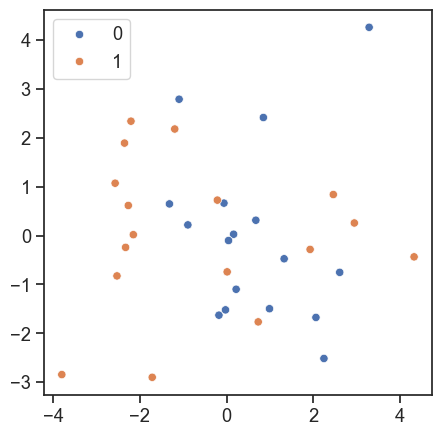

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

from sklearn.decomposition import PCA

xy = PCA(n_components=2).fit_transform(A_hat_norm_X_Theta.detach().numpy())


# We color the nodes by the membership of the karate club members.
import networkx as nx

Gnx = nx.karate_club_graph()
labels = np.unique([d[1]["club"] for d in Gnx.nodes(data=True)], return_inverse=True)[1]


sns.scatterplot(x=xy[:, 0], y=xy[:, 1], hue=labels, ax=ax)

We observe that the nodes are separated into two clusters, despite the fact that the GCN is **untrained!** 

Now, let's train the GCN to predict the membership of the karate club. Namely, the GCN is given the feature matrix $X$ and the adjacency matrix $A$, and it learns the parameter matrix $\Theta$ to predict the membership of the karate club. We will split the nodes into the training and testing sets, and evaluate the accuracy of the model using the testing set.

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm


# Define the GCN model by putting the above code into a class.
class GCN(torch.nn.Module):
    def __init__(self, in_features, out_features, A):
        super(GCN, self).__init__()
        self.linear = torch.nn.Parameter(
            torch.randn(in_features, out_features), requires_grad=True
        )

        A_hat = A + sparse.eye(A.shape[0])
        deg = A_hat.sum(axis=1).A1
        D_hat = sparse.diags(deg)
        D_hat_inv = sparse.diags(1 / deg)
        self.A_hat_norm = D_hat_inv @ A_hat

    def forward(self, x):
        Ax = torch.tensor(self.A_hat_norm @ x, dtype=torch.float32)
        return torch.nn.functional.sigmoid(Ax @ self.linear)


# Initialize the model
model = GCN(in_features=A.shape[0], out_features=2, A=A)

# Initialize the feature matrix
X = torch.eye(A.shape[0])

# Initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Initialize the loss function
criterion = torch.nn.CrossEntropyLoss()

# Split the data into training and testing sets
train_idx, test_idx = train_test_split(
    np.arange(G.vcount()), test_size=0.2, random_state=42
)
labels = torch.tensor(labels)
train_features = X[train_idx]
train_labels = labels[train_idx]
test_features = X[test_idx]
test_labels = labels[test_idx]

# Define the number of training epochs
n_train = 200

# Initialize the progress bar
pbar = tqdm(range(n_train))

# Initialize the loss history
loss_history = []

# Train the model
for epoch in pbar:
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output[train_idx], train_labels)
    loss.backward()
    optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        output = model(X)
        _, predicted = torch.max(output, 1)
        accuracy = (predicted[test_idx] == test_labels).float().mean()
        loss_history.append(loss.item())
        pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item())

/var/folders/j7/9dgqq5g53vnbsbmvh2yqtckr0000gr/T/ipykernel_3525/2285251930.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)
100%|██████████| 200/200 [00:00<00:00, 901.44it/s, accuracy=0.857, loss=0.439]


The loss decreases as the training progresses, which indicates that the model is learning.


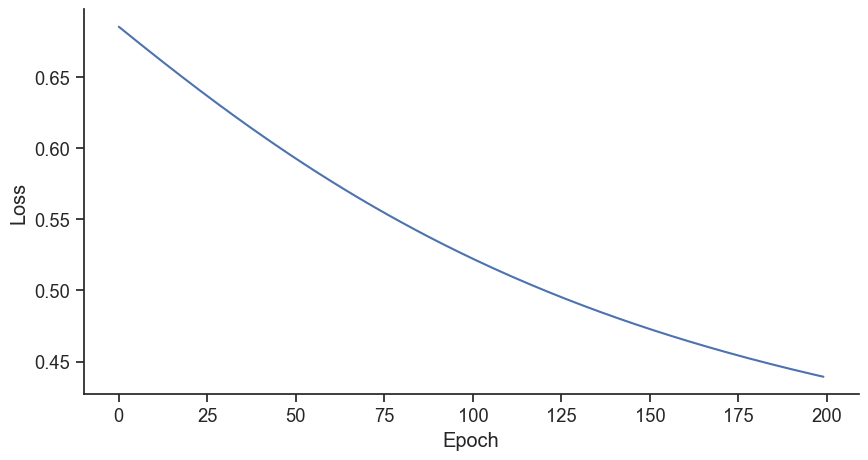

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=range(n_train), y=loss_history, ax=ax)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
sns.despine()
plt.show()

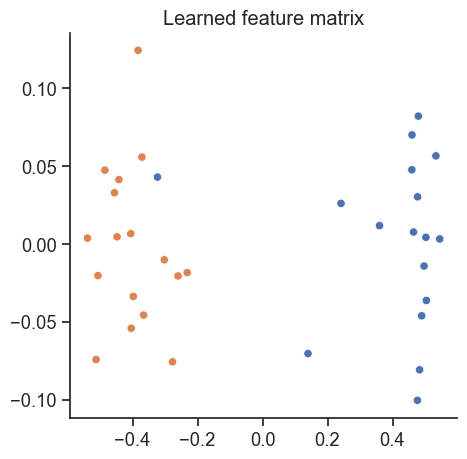

In [ ]:
Xprime = model(X)

fig, ax = plt.subplots(figsize=(5, 5))

xy = PCA(n_components=2).fit_transform(Xprime.detach().numpy())

sns.scatterplot(x=xy[:, 0], y=xy[:, 1], hue=labels, ax=ax, legend=False)
ax.set_title("Learned feature matrix")
sns.despine()
plt.show()

### Exercise 3 🏋️:

1. Build a two-layer GCN and train it to predict the membership of the karate club.
2. Compare the performance of the two-layer GCN with the one-layer GCN.